## Task 1: Overcoming Distribution Shift for Better Predictors

**Goal**: We have a dataset fitting a predictor on the entire dataset results in mediocre accuracy. We want to identify which feature to split the dataset on such that we produce two separate specialized predictors.

**Learning Outcomes**: Learn about linear predictors. Apply linear predictors to find how to separate a dataset into two parts in order to indentify distribution shift.

**Prerequisites**: Basic understanding of python and linear functions (e.g. y=mx+b).


### Step 1: Creating a simple logistic regression predictor
Given a dataset of two classes: class 0 (red circles) and class 1 (blue crosses), you can learn a classifier to classify the red circles and blue crosses into different categories. 

In this example, we'll look at two different predictors:
1. A "good" predictor using logistic regression that learns from the data patterns
2. A "bad" predictor that simply uses a vertical line to separate classes


The visualization shows:
- Left plot: The raw data points colored by their class
- Middle plot: How the good predictor (logistic regression) separates the classes
- Right plot: How the bad predictor (vertical line) attempts to separate the classes

Run the cell below to see an interactive visualization. Click the "Run Analysis" 
button to generate new random data and see how the predictors perform.

To make make a predictor, you can use the sklearn logistic regression function: 

```python
import numpy as np
from sklearn.linear_model import LogisticRegression

X = np.vstack([np.random.randn(50,2) - 2, np.random.randn(50,2) + 2])
y = np.hstack([np.zeros(50), np.ones(50)])

# instantiate a logistic regression classifier
good_clf = LogisticRegression()
# fit the classifier to data 
good_clf.fit(X, y)

```


Button(description='Run Analysis', style=ButtonStyle())

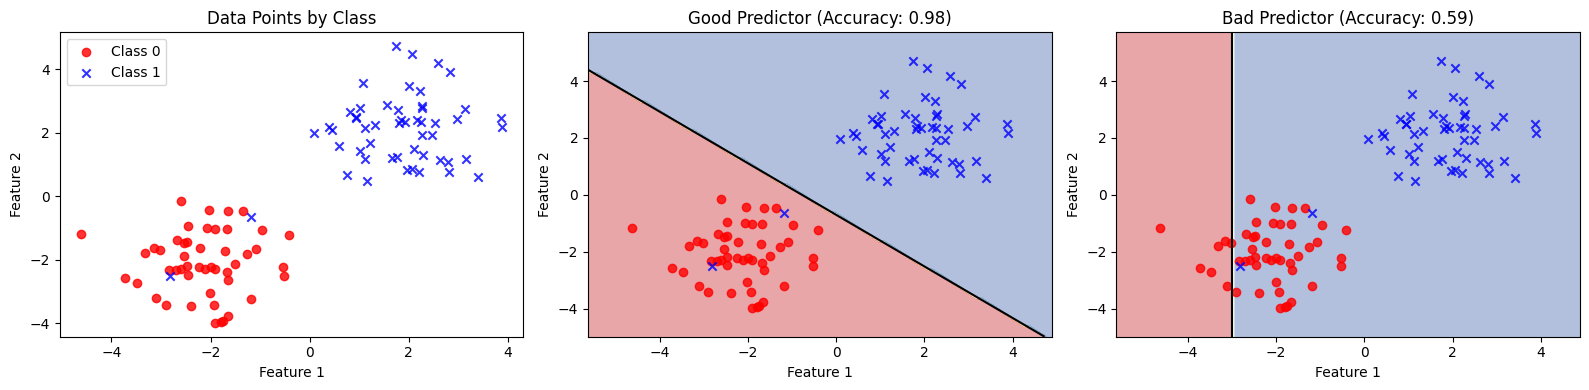

In [47]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd
import ipywidgets as widgets

def run_prediction_analysis():
    # Generate a random binary classification dataset
    np.random.seed(42)
    X = np.vstack([np.random.randn(50,2) - 2, np.random.randn(50,2) + 2])
    y = np.hstack([np.zeros(50), np.ones(50)])
    y[np.random.choice(100, 3)] = 1 - y[np.random.choice(100, 3)]  # Flip ~3% of labels

    # Create a figure with three subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

    # First subplot: Show the two data classes
    ax1.scatter(X[y==0, 0], X[y==0, 1], label='Class 0', alpha=0.8, c='red', marker='o')
    ax1.scatter(X[y==1, 0], X[y==1, 1], label='Class 1', alpha=0.8, c='blue', marker='x')
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')
    ax1.set_title('Data Points by Class')
    ax1.legend()

    # Create a good predictor (logistic regression)
    good_clf = LogisticRegression()
    good_clf.fit(X, y)

    # Create a deliberately bad predictor (vertical line at x=thresh)
    thresh = -3
    class BadPredictor:
        def predict(self, X):
            return X[:, 0] > thresh
        
        def score(self, X, y):
            return np.mean(self.predict(X) == y)
            
    bad_clf = BadPredictor()

    # Create mesh grid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Second subplot: Plot good predictor
    Z = good_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax2.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    ax2.scatter(X[y==0, 0], X[y==0, 1], label='Class 0', alpha=0.8, c='red', marker='o')
    ax2.scatter(X[y==1, 0], X[y==1, 1], label='Class 1', alpha=0.8, c='blue', marker='x')
    ax2.set_xlabel('Feature 1')
    ax2.set_ylabel('Feature 2')
    ax2.set_title(f'Good Predictor (Accuracy: {good_clf.score(X, y):.2f})')
    # Plot decision boundary
    Z_contour = good_clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    ax2.contour(xx, yy, Z_contour, levels=[0.5], colors='k', linestyles='-')

    # Third subplot: Plot bad predictor
    Z = bad_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape).astype(int)
    ax3.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    ax3.scatter(X[y==0, 0], X[y==0, 1], label='Class 0', alpha=0.8, c='red', marker='o')
    ax3.scatter(X[y==1, 0], X[y==1, 1], label='Class 1', alpha=0.8, c='blue', marker='x')
    ax3.set_xlabel('Feature 1')
    ax3.set_ylabel('Feature 2')
    ax3.set_title(f'Bad Predictor (Accuracy: {bad_clf.score(X, y):.2f})')
    # Plot decision boundary
    ax3.axvline(x=thresh, color='k', linestyle='-')

    plt.tight_layout()
    plt.show()

button = widgets.Button(description='Run Analysis')
button.on_click(lambda x: run_prediction_analysis())
display(button) 


### Part 2: Working with the dataset
In this section we will download the dataset that we want to work with, we will show you how to see the features and work with the features. 

Using the ```ucimlrepo``` library, we can can download the dataset and examine the features. This dataset has 13 features and a target variable where the goal is to predict whether an individual has an income of above or below $50,000 USD. This data is drawn from the US Census. 

In [48]:
from folktables import ACSDataSource, ACSIncome
  
data_source = ACSDataSource(survey_year='2018', horizon='1-Year', survey='person')
data = data_source.get_data(states=["RI"], download=True)

In [49]:
X, Y, _ = ACSIncome.df_to_numpy(data)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Features:", ACSIncome.features)
features_descriptions = {
        'AGEP': {'Age', 'Integer'},
        'COW': {'Class of Worker', 'Categorical'},
        'SCHL': {'Educational Level', 'Integer'},
        'MAR': {'Marital Status', 'Categorical'},
        'OCCP': {'Occupation', 'Categorical'},
        'POBP': {'Place of Birth', 'Categorical'},
        'RELP': {'Relationship', 'Categorical'},
        'WKHP': {'Usual Hours Worked per Week', 'Integer'},
        'SEX': {'Sex', 'Binary'},
        'RAC1P': {'Race', 'Categorical'},
}
pd.DataFrame.from_dict(features_descriptions, orient='index', columns=['Description', 'Data Type'])

Features: ['AGEP', 'COW', 'SCHL', 'MAR', 'OCCP', 'POBP', 'RELP', 'WKHP', 'SEX', 'RAC1P']


,Description,Data Type
AGEP,Age,Integer
COW,Class of Worker,Categorical
SCHL,Educational Level,Integer
MAR,Marital Status,Categorical
OCCP,Categorical,Occupation
POBP,Categorical,Place of Birth
RELP,Relationship,Categorical
WKHP,Usual Hours Worked per Week,Integer
SEX,Sex,Binary
RAC1P,Race,Categorical


### Part 3: Your task
Your task is to split data into two groups and fit a predictor on to each group. You want to split the data in a way such that the average accuracy across all samples is as high as possible.

In [62]:
features = ACSIncome.features

# overall accuracy
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, Y_train)
overall_score = clf.score(X_test, Y_test)
print(f"Overall Accuracy: {overall_score:.3f}")

### YOUR CODE STARTS HERE 
# Step 1: Split the data into two groups
split_feature = 'SEX'
feature_ind = list(features).index(split_feature)

def feature_mask(train_data:np.ndarray, feature_ind:int, threshold: float|None= None, equal:bool|None = None) -> np.ndarray:
    if threshold is None and equal is None:
        raise ValueError("Either threshold or equal must be provided")
    elif threshold is None:
        return train_data[:, feature_ind] == equal
    elif equal is None:
        return train_data[:, feature_ind] < threshold

mask = feature_mask(X_train, feature_ind, equal=1)
X1_train = X_train[mask]
Y1_train = Y_train[mask]
X2_train = X_train[~mask]
Y2_train = Y_train[~mask]

# Step 2: Fit a predictor on each subgroup
clf1 = LogisticRegression(max_iter=10000)
clf1.fit(X1_train, Y1_train)

clf2 = LogisticRegression(max_iter=10000)
clf2.fit(X2_train, Y2_train)

# Step 3: Evaluate the predictor
score1 = clf1.score(X1_train, Y1_train)
score2 = clf2.score(X2_train, Y2_train)
# weighted average of the two scores
weighted_score = (score1 * len(X1_train) + score2 * len(X2_train)) / (len(X1_train) + len(X2_train))
print(f"Weighted Average Accuracy: {weighted_score:.3f}")

# Step 4: Evaluate the predictor on the test dataset
# Split test data using the same feature and threshold
mask_test = feature_mask(X_test, feature_ind, equal=1)
X1_test = X_test[mask_test]
Y1_test = Y_test[mask_test]
X2_test = X_test[~mask_test]
Y2_test = Y_test[~mask_test]

# Get scores on test data
test_score1 = clf1.score(X1_test, Y1_test)
test_score2 = clf2.score(X2_test, Y2_test)

### YOUR CODE ENDS HERE ### 

# Calculate weighted average test score
test_weighted_score = (test_score1 * len(X1_test) + test_score2 * len(X2_test)) / (len(X1_test) + len(X2_test))
print(f"Weighted Average Test Accuracy: {test_weighted_score:.3f}")


Overall Accuracy: 0.802
Weighted Average Accuracy: 0.781
Weighted Average Test Accuracy: 0.808
